# Project: Sleep Health and Lifestyle

## Synopsis of the DataSet

### The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

## Objectives : To evaluate the following 

### 1. Correlation between Sleep duration and Quality Of Sleep?

### 2. Correlation between Stress level and Quality of Sleep?

### 3. Correlation between Stress Level and Sleep duration?

### 4. Statistical significant association between Gender and Sleep_Disorder?

### 5. Statistcal significant difference of the mean Age among Normal, Sleep apnea & insomnia?

### 6.  Statistcal significant difference of the mean Sleep_Duration among Normal, Sleep apnea & insomnia?

### 7. Statistcal significant difference of the mean Sleep_Quality among Normal, Sleep apnea & insomnia?

### 8. Statistcal significant difference of the mean Physical_Activity_Level among Normal, Sleep apnea & insomnia?

In [ ]:
# IMPORTING THE RELEVANT LIBRARIES 

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

In [1]:
!pip install dash dash-renderer dash-html-components dash-core-components plotly

In [2]:
!pip install jupyter-dash

In [ ]:
# READING THE FILE and EXAMINING THE CONTENTS OF THE RESULTANT DATAFRAME

In [3]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


In [ ]:
#CHECKING HOW LARGE THE DATA IS

In [4]:
df.shape

(374, 13)

In [ ]:
# EXAMINING THE CONCISE SUMMARY OF THE DATAFRAME

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
# EXAMINING THE DESCRIPTIVE STATISTICS OF THE DATA

In [6]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Exploratory Data Analysis (EDA)

### 1. Correlation between Sleep duration and Quality Of Sleep

In [27]:
# Load the new dataset
sleep_data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Create a Dash application
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Sleep Health and Lifestyle Dashboard", style={'text-align': 'center'}),
    
    # Dropdown to select a plot
    dcc.Dropdown(
        id='plot-selector',
        options=[
            {'label': 'Line Plot', 'value': 'line-plot'},
            {'label': 'Histogram', 'value': 'histogram'},
            # Add more options based on available columns
        ],
        value='line-plot'  # Default value
    ),
    
    # Placeholder for the selected plot
    dcc.Graph(id='selected-plot'),
])

# Define callback to update the selected plot based on user's choice
@app.callback(
    Output('selected-plot', 'figure'),
    [Input('plot-selector', 'value')]
)
def update_selected_plot(selected_value):
    # Update the plotting logic based on the columns and desired plots
    if selected_value == 'line-plot':
        fig = px.line(sleep_data, x='Quality of Sleep',y='Sleep Duration', 
                      title='Line Plot: DataColumn1 Over Time')
        return fig

    elif selected_value == 'histogram':
        fig = px.histogram(sleep_data, x='Quality of Sleep', title='Histogram: DataColumn2 Distribution')
        return fig

    # Add more plotting logic as needed

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8055)

### Observation - "high positive correlation" implies that as the 'Quality of Sleep' increases, there is a tendency for 'Sleep Duration' to also increase. In other words, individuals with higher quality of sleep tend to have longer sleep durations.

### 2. Correlation between Stress level and Quality of Sleep

In [28]:
# Create a Dash application
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Sleep Health and Lifestyle Dashboard", style={'text-align': 'center'}),
    
    # Dropdown to select a plot
    dcc.Dropdown(
        id='plot-selector',
        options=[
            {'label': 'Line Plot', 'value': 'line-plot'},
            {'label': 'Histogram', 'value': 'histogram'},
            # Add more options based on available columns
        ],
        value='line-plot'  # Default value
    ),
    
    # Placeholder for the selected plot
    dcc.Graph(id='selected-plot'),
])

# Define callback to update the selected plot based on user's choice
@app.callback(
    Output('selected-plot', 'figure'),
    [Input('plot-selector', 'value')]
)
def update_selected_plot(selected_value):
    # Update the plotting logic based on the columns and desired plots
    if selected_value == 'line-plot':
        fig = px.line(sleep_data, x='Quality of Sleep',y='Stress Level', 
                      title='Line Plot: DataColumn1 Over Time')
        return fig

    elif selected_value == 'histogram':
        fig = px.histogram(sleep_data, x='Quality of Sleep', title='Histogram: DataColumn2 Distribution')
        return fig

    # Add more plotting logic as needed

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8055)

### Observation - "high negative correlation" between 'Stress Level' and 'Quality of Sleep'. This implies that as the 'Stress Level' increases, there is a tendency for the 'Quality of Sleep' to decrease. In other words, higher stress levels are associated with lower quality of sleep.

### 3. Correlation between Stress Level and Sleep duration

In [29]:
# Create a Dash application
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Sleep Health and Lifestyle Dashboard", style={'text-align': 'center'}),
    
    # Dropdown to select a plot
    dcc.Dropdown(
        id='plot-selector',
        options=[
            {'label': 'Line Plot', 'value': 'line-plot'},
            {'label': 'Histogram', 'value': 'histogram'},
            # Add more options based on available columns
        ],
        value='line-plot'  # Default value
    ),
    
    # Placeholder for the selected plot
    dcc.Graph(id='selected-plot'),
])

# Define callback to update the selected plot based on user's choice
@app.callback(
    Output('selected-plot', 'figure'),
    [Input('plot-selector', 'value')]
)
def update_selected_plot(selected_value):
    # Update the plotting logic based on the columns and desired plots
    if selected_value == 'line-plot':
        fig = px.line(sleep_data, x='Sleep Duration',y='Stress Level', 
                      title='Line Plot: DataColumn1 Over Time')
        return fig

    elif selected_value == 'histogram':
        fig = px.histogram(sleep_data, x='Sleep Duration', title='Histogram: DataColumn2 Distribution')
        return fig

    # Add more plotting logic as needed

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8055)

### Observation - "High negative correlation" between 'Stress Level' and 'Sleep Duration'. This implies that as the 'Stress Level' increases, there is a tendency for 'Sleep Duration' to decrease. In other words, higher stress levels are associated with shorter sleep durations.

### 4. Statistical significant association between Gender and Sleep_Disorder?

Sleep Disorder,Insomnia,None,Sleep Apnea
Gender,,,
Female,36,82,67
Male,41,137,11


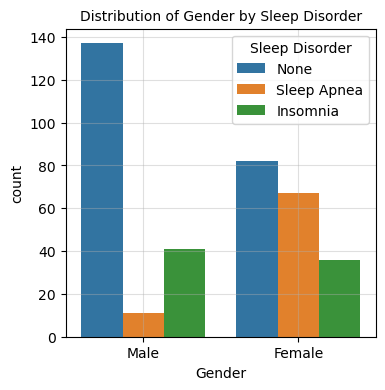

Test statistic:  54.30602007353474
Test p-value:  1.6128633524576768e-12
Reject null hypothesis. There is a statistical significant association between gender and sleep disorder.


In [37]:
from scipy.stats import chi2_contingency

# create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Sleep Disorder'])
display(contingency_table)

# visualization - bar chart
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='Gender', hue='Sleep Disorder')
plt.title('Distribution of Gender by Sleep Disorder', fontsize=10)
plt.grid(alpha=0.4)
plt.show()

# perform a chi-square test
res = chi2_contingency(contingency_table)
print('Test statistic: ', res.statistic)
print('Test p-value: ', res.pvalue)

if res.pvalue < 0.05:
    print('Reject null hypothesis. There is a statistical significant association between gender and sleep disorder.')
else:
    print('Reject null hypothesis. Insufficient evidence to conclude a statistical significant association between gender and sleep disorder.')

### Observation - From above, high test statistic of 54.31 and an extremely low p-value of approximately 1.61e-12, lead to the rejection of the null hypothesis. This indicates a statistically significant association between gender and the presence of sleep disorders.

### 5. Statistcal significant difference of the mean Age among Normal, Sleep apnea & insomnia?

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,43.519481,4.808464,28.0,43.0,44.0,45.00,53.0
None,219.0,39.036530,7.827764,27.0,32.0,38.0,43.00,59.0
Sleep Apnea,78.0,49.705128,8.990773,28.0,49.0,50.0,57.75,59.0


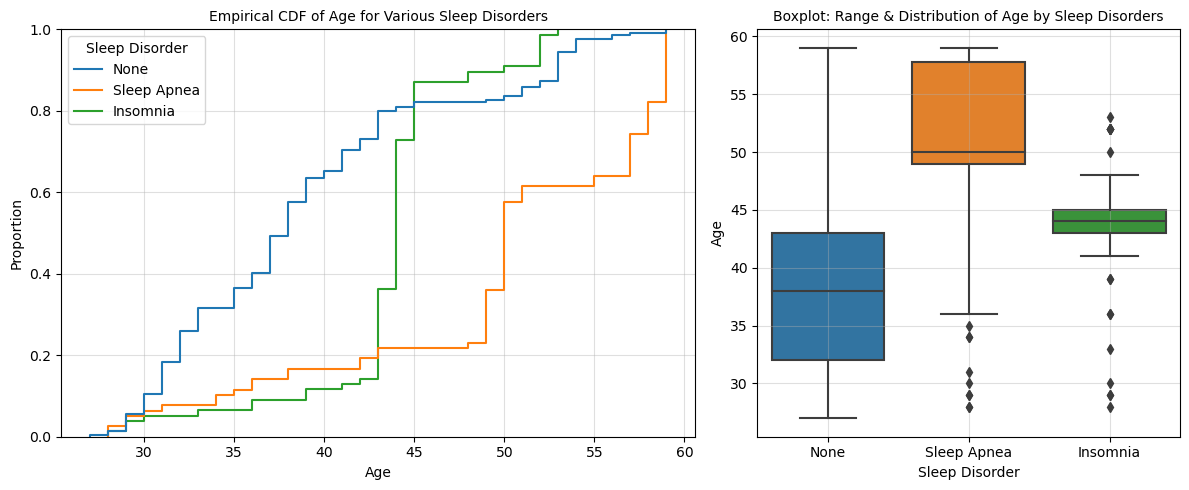

Test statistic:  84.75698863771355
Test p-value:  3.937801009275989e-19
Reject null hypothesis. There is a statistically significant difference in age between different sleep disorders.


In [28]:
from scipy.stats import kruskal
# summary stats for the feature `Age` by `Sleep_Disorder`
display(df.groupby('Sleep Disorder').Age.describe())

# visualization: Empirical CDF plot & boxplot
figure, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1.5, 1]})
sns.ecdfplot(data=df, x='Age', hue='Sleep Disorder', ax=axes[0])
axes[0].set_title('Empirical CDF of Age for Various Sleep Disorders', fontsize=10)
axes[0].grid(alpha=0.4)
sns.boxplot(data=df, y='Age', x='Sleep Disorder', ax=axes[1])
axes[1].set_title('Boxplot: Range & Distribution of Age by Sleep Disorders', fontsize=10)
axes[1].grid(alpha=0.4)
plt.tight_layout()
plt.show()

# define different groups in the `Sleep_Disorder`
groups = df.groupby('Sleep Disorder')
normal = groups.get_group('None')
sleep_apnea = groups.get_group('Sleep Apnea')
insomnia = groups.get_group('Insomnia')

# perform Kruskal-Wallis H-test
# the test works on 2 or more independent samples, which may have different sizes
res = kruskal(normal['Age'], sleep_apnea['Age'], insomnia['Age'])
print('Test statistic: ', res.statistic)
print('Test p-value: ', res.pvalue)

if res.pvalue < 0.05:
    print('Reject null hypothesis. There is a statistically significant difference in age between different sleep disorders.')
else:
    print('Fail to reject null hypothesis. There is insufficient evidence to conclude a statistically significant difference in age between different sleep disorders.')


### Observation - With a high test statistic of 84.76 and an extremely low p-value of approximately 3.94e-19, the null hypothesis is rejected. This suggests a statistically significant difference in age between different sleep disorders.

### 6. Statistcal significant difference of the mean Sleep_Duration among Normal, Sleep apnea & insomnia?

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,6.589610,0.387157,5.9,6.4,6.5,6.6,8.3
None,219.0,7.358447,0.732320,6.0,7.1,7.4,7.8,8.5
Sleep Apnea,78.0,7.032051,0.974812,5.8,6.1,6.8,8.1,8.2


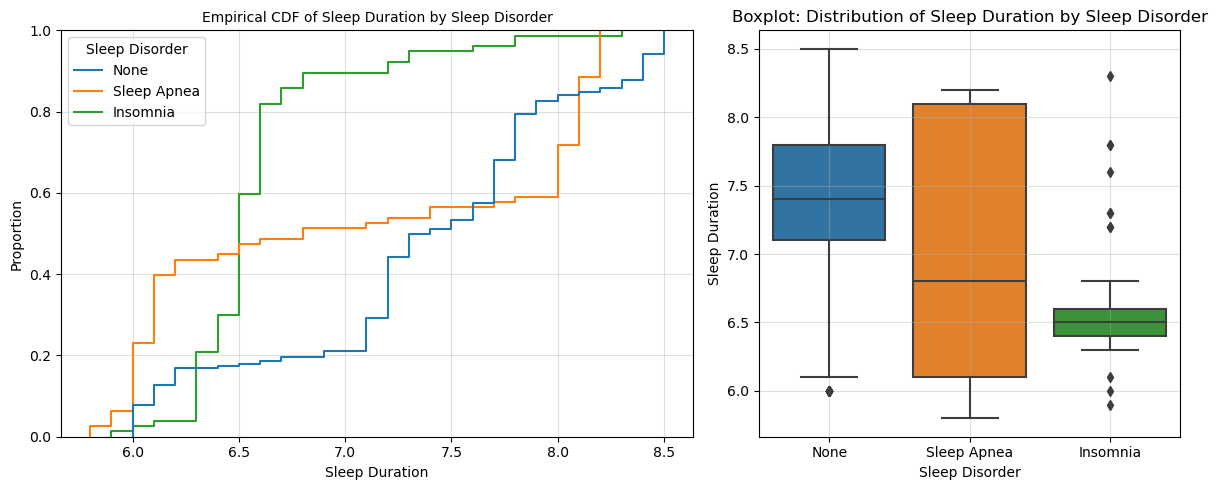

Test statistic:  43.89886573554084
Test p-value:  2.9341507599792686e-10
Reject null hypothesis. There is a statistically significant difference in the mean sleep duration between normal, sleep apnea, and insomnia.


In [38]:
# Display summary stats for the feature `Sleep Duration` by `Sleep_Disorder`
display(df.groupby('Sleep Disorder')['Sleep Duration'].describe())

# Visualization: Empirical CDF plot & boxplot
figure, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1.5, 1]})
sns.ecdfplot(data=df, x='Sleep Duration', hue='Sleep Disorder', ax=axes[0])
axes[0].set_title('Empirical CDF of Sleep Duration by Sleep Disorder', fontsize=10)
axes[0].grid(alpha=0.4)
sns.boxplot(data=df, y='Sleep Duration', x='Sleep Disorder', ax=axes[1])
axes[1].set_title('Boxplot: Distribution of Sleep Duration by Sleep Disorder')
axes[1].grid(alpha=0.4)
plt.tight_layout()
plt.show()

# Define the different groups in the `Sleep_Disorder`
groups = df.groupby('Sleep Disorder')
normal = groups.get_group('None')
sleep_apnea = groups.get_group('Sleep Apnea')
insomnia = groups.get_group('Insomnia')

# Kruskal-Wallis H-test
res = kruskal(normal['Sleep Duration'], sleep_apnea['Sleep Duration'], insomnia['Sleep Duration'])
print('Test statistic: ', res.statistic)
print('Test p-value: ', res.pvalue)

if res.pvalue < 0.05:
    print('Reject null hypothesis. There is a statistically significant difference in the mean sleep duration between normal, sleep apnea, and insomnia.')
else:
    print('Fail to reject null hypothesis. Insufficient evidence to conclude a statistically significant difference in the mean sleep duration between normal, sleep apnea, and insomnia.')


### Observation - With a substantial test statistic of 43.90 and an extremely low p-value of approximately 2.93e-10, the null hypothesis is rejected. This indicates a statistically significant difference in the mean sleep duration among individuals with normal sleep, sleep apnea, and insomnia.

### 7. Statistcal significant difference of the mean Sleep_Quality among Normal, Sleep apnea & insomnia

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,6.532468,0.804337,4.0,6.0,7.0,7.0,9.0
None,219.0,7.625571,0.975142,6.0,7.0,8.0,8.0,9.0
Sleep Apnea,78.0,7.205128,1.646397,4.0,6.0,6.0,9.0,9.0


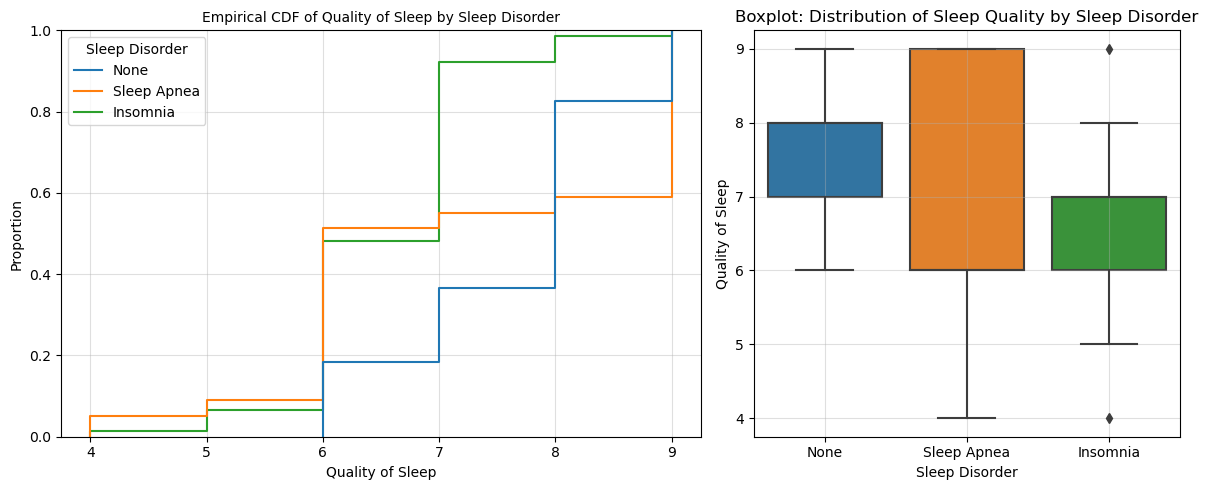

Test statistic:  49.17890467085048
Test p-value:  2.0938064711211446e-11
Reject null hypothesis. There is a statistically significant difference in the mean sleep quality between normal, sleep apnea, and insomnia.


In [45]:
# Display summary stats for the feature `Sleep Quality` by `Sleep_Disorder`
display(df.groupby('Sleep Disorder')['Quality of Sleep'].describe())

# Visualization: Empirical CDF plot & boxplot
figure, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1.5, 1]})
sns.ecdfplot(data=df, x='Quality of Sleep', hue='Sleep Disorder', ax=axes[0])
axes[0].set_title('Empirical CDF of Quality of Sleep by Sleep Disorder', fontsize=10)
axes[0].grid(alpha=0.4)
sns.boxplot(data=df, y='Quality of Sleep', x='Sleep Disorder', ax=axes[1])
axes[1].set_title('Boxplot: Distribution of Sleep Quality by Sleep Disorder')
axes[1].grid(alpha=0.4)
plt.tight_layout()
plt.show()

# Define the different groups in the `Sleep_Disorder`
groups = df.groupby('Sleep Disorder')
normal = groups.get_group('None')
sleep_apnea = groups.get_group('Sleep Apnea')
insomnia = groups.get_group('Insomnia')

# Kruskal-Wallis H-test
res = kruskal(normal['Quality of Sleep'], sleep_apnea['Quality of Sleep'], insomnia['Quality of Sleep'])
print('Test statistic: ', res.statistic)
print('Test p-value: ', res.pvalue)

if res.pvalue < 0.05:
    print('Reject null hypothesis. There is a statistically significant difference in the mean sleep quality between normal, sleep apnea, and insomnia.')
else:
    print('Fail to reject null hypothesis. Insufficient evidence to conclude a statistically significant difference in the mean sleep quality between normal, sleep apnea, and insomnia.')


### With a considerable test statistic of 49.18 and an extremely low p-value of approximately 2.09e-11, the null hypothesis is rejected. This suggests a statistically significant difference in the mean sleep quality among individuals with normal sleep, sleep apnea, and insomnia.

### 8. Statistcal significant difference of the mean Physical_Activity_Level among Normal, Sleep apnea & insomnia?

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,46.818182,11.751514,30.0,45.0,45.0,45.0,90.0
None,219.0,57.949772,20.929814,30.0,30.0,60.0,75.0,90.0
Sleep Apnea,78.0,74.794872,17.926516,30.0,75.0,75.0,90.0,90.0


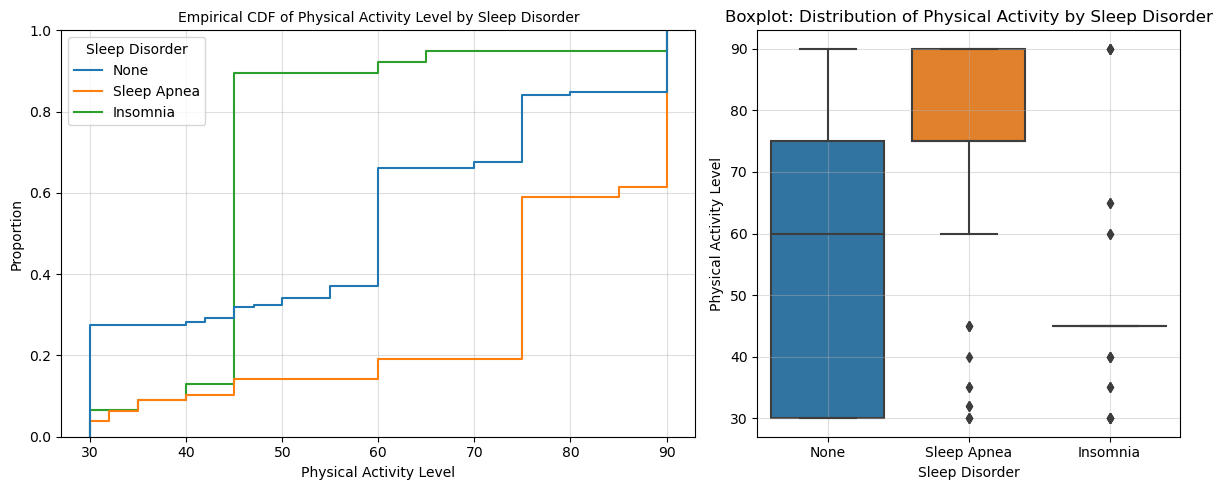

Test statistic:  70.40653498542584
Test p-value:  5.145353092400854e-16
Reject null hypothesis. There is a statistically significant difference in the mean physical activity level between normal, sleep apnea, and insomnia.


In [49]:
# Display summary stats for the feature `Physical Activity Level` by `Sleep_Disorder`
display(df.groupby('Sleep Disorder')['Physical Activity Level'].describe())

# Visualization: Empirical CDF plot & boxplot
figure, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1.5, 1]})
sns.ecdfplot(data=df, x='Physical Activity Level', hue='Sleep Disorder', ax=axes[0])
axes[0].set_title('Empirical CDF of Physical Activity Level by Sleep Disorder', fontsize=10)
axes[0].grid(alpha=0.4)
sns.boxplot(data=df, y='Physical Activity Level', x='Sleep Disorder', ax=axes[1])
axes[1].set_title('Boxplot: Distribution of Physical Activity by Sleep Disorder')
axes[1].grid(alpha=0.4)
plt.tight_layout()
plt.show()

# Define the different groups in the `Sleep_Disorder`
groups = df.groupby('Sleep Disorder')
normal = groups.get_group('None')
sleep_apnea = groups.get_group('Sleep Apnea')
insomnia = groups.get_group('Insomnia')

# Kruskal-Wallis H-test
res = kruskal(normal['Physical Activity Level'], sleep_apnea['Physical Activity Level'], insomnia['Physical Activity Level'])
print('Test statistic: ', res.statistic)
print('Test p-value: ', res.pvalue)

if res.pvalue < 0.05:
    print('Reject null hypothesis. There is a statistically significant difference in the mean physical activity level between normal, sleep apnea, and insomnia.')
else:
    print('Fail to reject null hypothesis. Insufficient evidence to conclude a statistically significant difference in the mean physical activity level between normal, sleep apnea, and insomnia.')


### With a substantial test statistic of 70.41 and an extremely low p-value of approximately 5.15e-16, the null hypothesis is rejected. This indicates a statistically significant difference in the mean physical activity level among individuals with normal sleep, sleep apnea, and insomnia.

## Managerial Implications

### 1. Quality of Sleep and Sleep Duration: A "high positive correlation" between Quality of Sleep and Sleep Duration suggests that individuals experiencing higher sleep quality tend to have longer sleep durations. Prioritizing initiatives to improve sleep quality (e.g., mindfulness training, sleep hygiene education) can potentially lead to increased sleep duration and improved employee health. Actionable Strategies can be taken such as offer sleep tracking devices, workshops on sleep hygiene practices, promote flexible work schedules, and create a relaxed work environment.

### 2. Stress Level and Quality of Sleep: A "high negative correlation" between Stress Level and Quality of Sleep indicates that higher stress levels are associated with lower sleep quality. Implement stress management programs (e.g., meditation, yoga), provide access to Employee Assistance Programs (EAPs), create a supportive work culture with open communication, and offer flexible work arrangements are few suggestions.

### 3. Stress Level and Sleep Duration:  "High negative correlation" between Stress Level and Sleep Duration implies that higher stress levels are associated with shorter sleep durations. Strategies such as flexible work hours, stress reduction workshops, and employee assistance programs may help in mitigating the effects of stress on sleep duration.

### 4. Gender and Sleep Disorders: The rejection of the null hypothesis based on a high test statistic and a very low p-value suggests a statistically significant association between gender and the presence of sleep disorders.Conduct surveys or interaction with focus groups to understand specific sleep challenges faced by different genders, consider gender-specific interventions or resources, and ensure equal access to existing sleep health initiatives.


### 5. Age and Sleep Disorders: A substantial test statistic and a very low p-value indicate a statistically significant difference in age between different sleep disorders. Develop age-specific sleep education programs, offer resources catering to the concerns of younger or older employees, and consider adjustments to work schedules or environments based on age-related sleep needs.

### 6. Sleep Duration and Sleep Quality: The rejection of null hypotheses regarding sleep duration and sleep quality levels highlights significant differences among individuals with normal sleep, sleep apnea, and insomnia. Provide access to sleep disorder diagnosis and treatment, offer support groups or individual counseling tailored to specific sleep disorders, and implement policies that support employees managing their conditions (e.g., flexible work arrangements, leave allowances).


### 7. Significant Differences in Physical Activity among Sleep Disorders: With a substantial test statistic of 70.41 and an extremely low p-value of approximately 5.15e-16, the null hypothesis is rejected. This indicates a statistically significant difference in the mean physical activity level among individuals with normal sleep, sleep apnea, and insomnia. Promoting physical activity can be a holistic approach to managing sleep disorders. Actionable Strategies can include offer on-site fitness classes or gym memberships, encourage active commutes, and integrate physical activity breaks into the workday.

In [ ]:
#source - https://www.kaggle.com/code/victoramachree/correlation-and-prediction